In [1550]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import xarray as xr
import torch

import sys
import os.path

sys.path.append(os.path.dirname(os.getcwd()))

from utils.train_test_utils import load_dataset, DatasetParameters


plt.rcParams['figure.figsize'] = (15, 7)


In [1588]:
# run_dir = "../output/4_20220504_100612"
# run_dir = "../output/20220504_183814"
run_dir = "../output/20220506_210112"
# run_dir = "../output/20220504_220127"
# run_dir = "../output_old/stocks_big_dataset/20220502_053220"

In [1589]:
dataset = xr.open_dataarray(f"../data/stocks_daily/stocks_big_dataset_2022-0425.nc")
train_df = pd.read_csv(f"{run_dir}/train_log.csv")
test_df = pd.read_csv(f"{run_dir}/test_results.csv", parse_dates=['Unnamed: 0']).rename({'Unnamed: 0': 'time'}, axis=1)

Text(0.5, 1.0, 'Train loss')

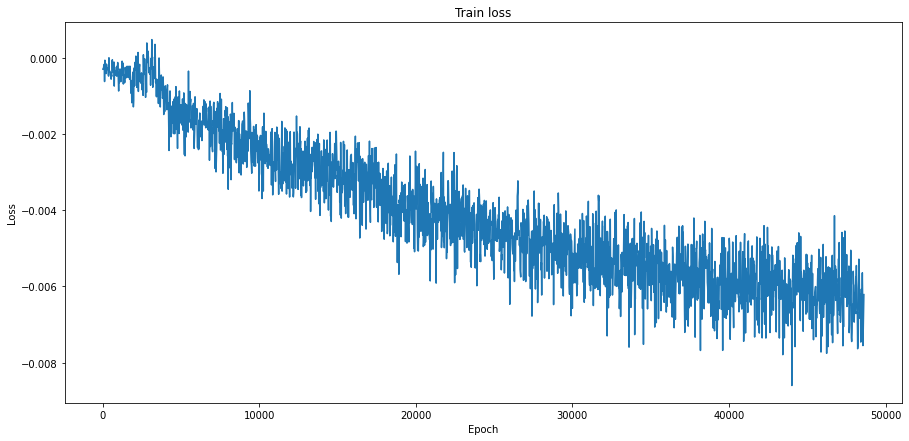

In [1590]:
sns.lineplot(x='epoch', y='train_loss', data=train_df)
# sns.lineplot(x='epoch', y='test_loss', data=train_df)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Train loss")
# plt.legend(labels=["Train", "Test"])

Text(0.5, 1.0, 'Test Loss')

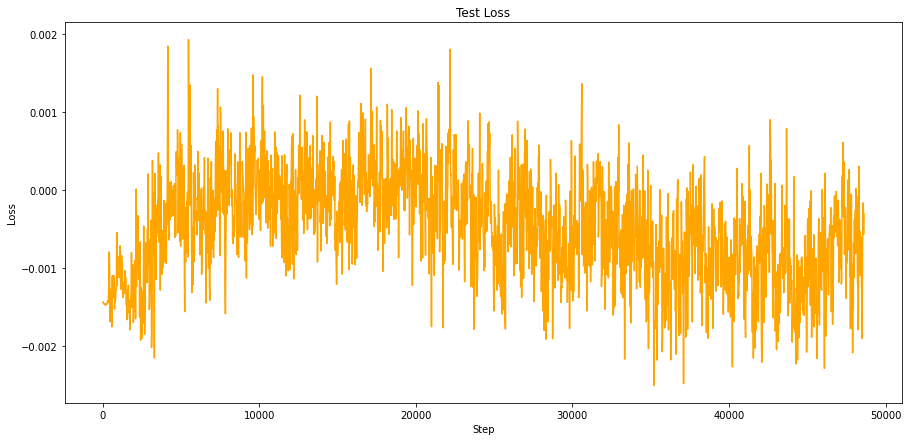

In [1591]:
# sns.lineplot(x='epoch', y='train_loss', data=train_df)
sns.lineplot(x='epoch', y='test_loss', data=train_df, color="orange")
plt.ylabel('Loss')
plt.xlabel('Step')
plt.title("Test Loss")
# plt.legend(labels=["Train", "Test"])

Text(0.5, 1.0, 'Test APV')

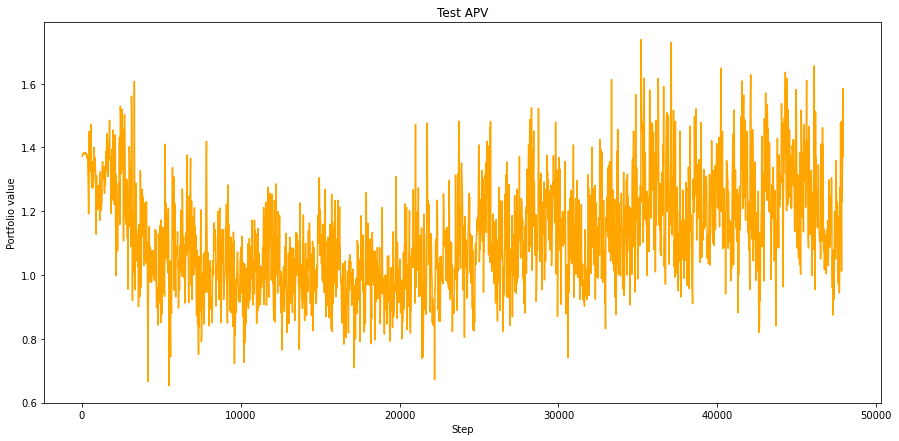

In [1587]:
# sns.lineplot(x='epoch', y='train_apv', data=train_df)
sns.lineplot(x='epoch', y='test_apv', data=train_df, color='orange')
plt.ylabel('Portfolio value')
plt.xlabel('Step')
plt.title("Test APV")
# plt.legend(labels=["Train", "Test"])

In [1577]:
best_epoch = train_df.iloc[np.argmax(train_df['test_apv'])]['epoch']

In [1578]:
best_epoch

35200

Text(0, 0.5, 'Part of portfolio')

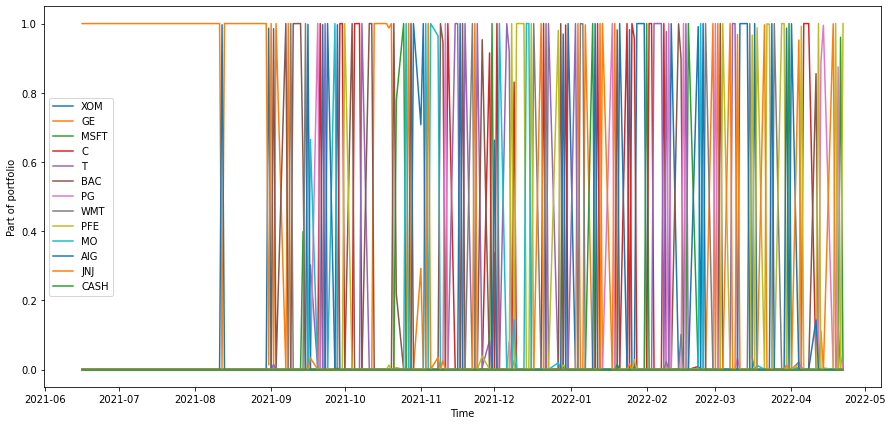

In [1579]:
assets = [re.sub(r"^asset_", "", col) for col in test_df.columns if col.startswith('asset_')]
assets = list(filter(lambda asset: asset != "cash", assets)) + ['cash']

for asset in assets:
    sns.lineplot(x='time', y=f'asset_{asset}', data=test_df)
    
plt.legend(labels=[asset.upper() for asset in assets])
plt.xlabel('Time')
plt.ylabel('Part of portfolio')
    

<AxesSubplot:xlabel='time', ylabel='Portfolio part'>

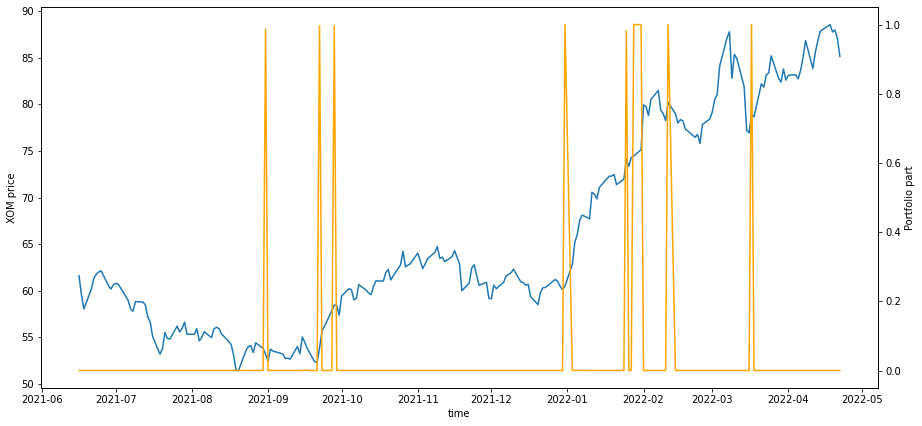

In [1581]:
plt.figure(figsize=(15, 7))

asset = 'xom'

asset_data = dataset.sel(asset=asset.upper(), feature='close').to_series()
asset_data = asset_data[(asset_data.index >= test_df['time'][0]) & (asset_data.index <= test_df['time'].iloc[-1])]

ax = sns.lineplot(data=asset_data)
plt.ylabel(f'{asset.upper()} price')
ax2 = ax.twinx()
plt.ylabel(f'Portfolio part')


sns.lineplot(x='time', y=test_df[f'asset_{asset}'], data=test_df, ax=ax2, color='orange')


<AxesSubplot:xlabel='time', ylabel='Price change'>

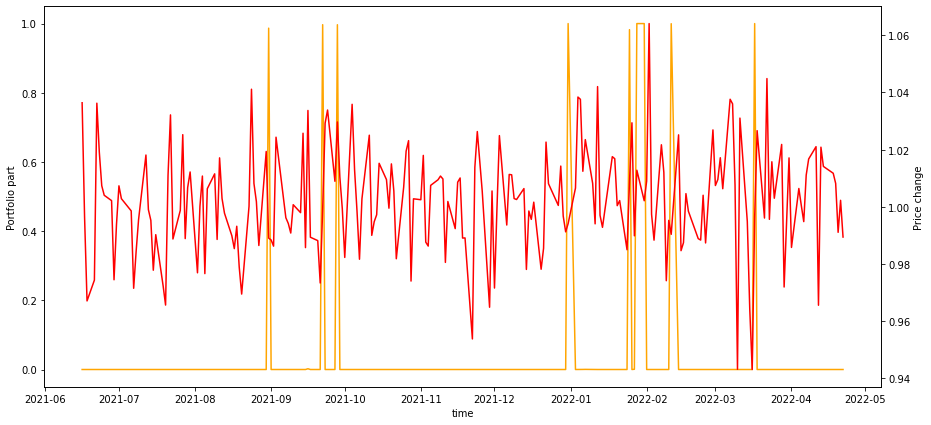

In [1582]:
plt.figure(figsize=(15, 7))

ax = sns.lineplot(x='time', y=test_df[f'asset_{asset}'], data=test_df, color='orange')

plt.ylabel(f'Portfolio part')
ax2 = ax.twinx()
plt.ylabel(f'Price change')

sns.lineplot(x='time', y=test_df[f'price_change_{asset}'], data=test_df, ax=ax2, color='red')


In [1003]:
# plt.figure(figsize=(15, 7))


# asset = 'spy'

# asset_data = dataset.sel(asset=asset.upper(), feature='close').to_series()
# asset_data = asset_data[asset_data.index >= test_df['time'][0]]
# # asset_data = asset_data[(asset_data.index >= test_df['time'][0]) & (asset_data.index < '2008-12-01')]


# plt.title('Our results vs S&P 500')
# sns.lineplot(x='time', y='portfolio_value', data=test_df, color='lime')
# sns.lineplot(data=asset_data/asset_data[0])


In [1005]:
test_df.head()

,time,asset_cash,asset_xom,asset_ge,asset_msft,asset_c,asset_t,asset_bac,asset_pg,asset_wmt,...,price_change_msft,price_change_c,price_change_t,price_change_bac,price_change_pg,price_change_wmt,price_change_pfe,price_change_mo,price_change_aig,price_change_jnj
0,2021-06-16,0.000086,0.071323,0.062178,0.087453,0.087015,0.084686,0.087219,0.086619,0.087052,...,0.994113,0.982171,1.006531,1.000725,0.998073,0.996016,0.998991,0.996256,1.008415,0.994679
1,2021-06-17,0.000086,0.071461,0.061514,0.087541,0.086804,0.084885,0.087344,0.086676,0.087092,...,0.996207,0.968030,0.992486,1.005557,0.986112,0.979643,0.992675,0.988935,1.002911,0.999635
2,2021-06-18,0.000086,0.071398,0.061602,0.087765,0.086330,0.084710,0.087638,0.086583,0.086933,...,1.013676,0.963616,0.988988,0.956271,1.009113,1.004156,1.004580,0.989445,0.943692,1.004805
3,2021-06-21,0.000087,0.070850,0.062256,0.088376,0.085534,0.084404,0.087164,0.087114,0.087316,...,0.994366,0.981847,0.996869,0.974372,0.985372,0.981484,0.983029,0.988052,0.960632,0.980390
4,2021-06-22,0.000087,0.070472,0.062722,0.089000,0.085193,0.084459,0.086948,0.087295,0.087385,...,1.012335,1.012424,1.009773,1.025013,1.007877,1.009100,1.015718,1.021162,1.019210,1.011483


In [1087]:
assets = ['XOM', 'GE', 'MSFT', 'C', 'T', 'BAC', 'PG', 'WMT', 'PFE', 'MO', 'AIG', 'JNJ']

dataset_params = DatasetParameters(
    dataset='../data/stocks_daily/stocks_big_dataset_2022-0425.nc',
    x_window_size=30,
    batch_size=128,
    dataset_date_range=slice('2006-06-01', None),
    dataset_features=['close', 'high', 'low', 'open'],
    dataset_assets=assets,
    train_range=('2010-06-29', '2020-05-01'),
    validation_range=('2020-05-01', '2021-05-01'),
#     test_range=(test_df['time'].iloc[0], test_df['time'].iloc[-1])
    test_range=('2021-05-03', '2022-04-22')
)

dm = load_dataset(dataset_params)

test_ds = dm.get_test_set_online(assets, dm._test_ind[0], dm._test_ind[-1], 30)

trivial_model_distribution = test_ds['y'][:, 0, :, :].squeeze()

# result = gains.prod(axis=0).mean()
# gain = result - 1

In [1091]:
trivial_model_performance = np.cumprod(trivial_model_distribution, axis=0).mean(axis=1)
trivial_model_performance = np.concatenate([[1], trivial_model_performance])

In [1092]:
asset_data = dataset.sel(asset=asset.upper(), feature='close').to_series()
asset_data = asset_data[(asset_data.index >= test_df['time'][0]) & (asset_data.index <= test_df['time'].iloc[-1])]

asset_data.shape

(216,)

In [1057]:
trivial_model_performance.shape

(216,)

In [1065]:
test_df['time'][0]

Timestamp('2021-06-16 00:00:00')

In [1058]:
asset_data.index[0]

Timestamp('2021-06-16 00:00:00')

In [1059]:
test_df['time'][0]

Timestamp('2021-06-16 00:00:00')

In [1071]:
test_df.head()

,time,asset_cash,asset_xom,asset_ge,asset_msft,asset_c,asset_t,asset_bac,asset_pg,asset_wmt,...,price_change_msft,price_change_c,price_change_t,price_change_bac,price_change_pg,price_change_wmt,price_change_pfe,price_change_mo,price_change_aig,price_change_jnj
0,2021-06-16,0.000086,0.071323,0.062178,0.087453,0.087015,0.084686,0.087219,0.086619,0.087052,...,0.994113,0.982171,1.006531,1.000725,0.998073,0.996016,0.998991,0.996256,1.008415,0.994679
1,2021-06-17,0.000086,0.071461,0.061514,0.087541,0.086804,0.084885,0.087344,0.086676,0.087092,...,0.996207,0.968030,0.992486,1.005557,0.986112,0.979643,0.992675,0.988935,1.002911,0.999635
2,2021-06-18,0.000086,0.071398,0.061602,0.087765,0.086330,0.084710,0.087638,0.086583,0.086933,...,1.013676,0.963616,0.988988,0.956271,1.009113,1.004156,1.004580,0.989445,0.943692,1.004805
3,2021-06-21,0.000087,0.070850,0.062256,0.088376,0.085534,0.084404,0.087164,0.087114,0.087316,...,0.994366,0.981847,0.996869,0.974372,0.985372,0.981484,0.983029,0.988052,0.960632,0.980390
4,2021-06-22,0.000087,0.070472,0.062722,0.089000,0.085193,0.084459,0.086948,0.087295,0.087385,...,1.012335,1.012424,1.009773,1.025013,1.007877,1.009100,1.015718,1.021162,1.019210,1.011483


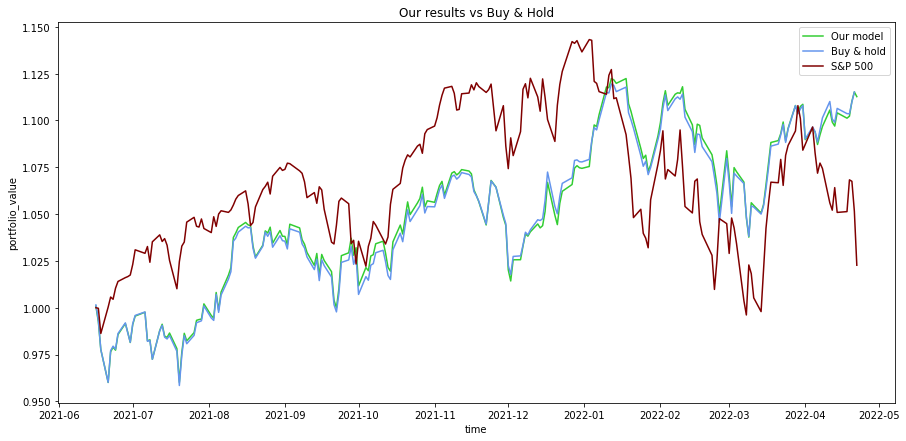

In [1070]:
plt.figure(figsize=(15, 7))


asset = 'spy'

asset_data = dataset.sel(asset=asset.upper(), feature='close').to_series()
asset_data = asset_data[(asset_data.index >= test_df['time'][0]) & (asset_data.index <= test_df['time'].iloc[-1])]
# asset_data = asset_data[(asset_data.index >= test_df['time'][0]) & (asset_data.index < '2008-12-01')]

# our_model = np.concatenate([[1], test_df['portfolio_value']])

plt.title('Our results vs Buy & Hold')
sns.lineplot(x='time', y='portfolio_value', data=test_df, color='limegreen')

sns.lineplot(x=test_df['time'][:-1], y=trivial_model_performance[1:], color='cornflowerblue')

sns.lineplot(data=asset_data/asset_data[0], color='maroon')

plt.legend(labels=["Our model", "Buy & hold", "S&P 500"])